In [30]:
from __future__ import division

import sys

import numpy as np
import pandas as pd
import seaborn as sns

import aneris

import matplotlib.pyplot as plt

from aneris.methods import reduce_ratio, constant_ratio, reduce_offset, constant_offset

%matplotlib inline
%autoreload 2

In [177]:
def plot(df, label=0, **kwargs):
    df = df.T.sort_index()
    df.index = df.index.map(int)
    df.columns = [label]
    df.plot(**kwargs)
    
def plot_all(horizon, histend, modelstart, ti, tf, n=1.2, rate=0.01, ax=None):
    ratio = pd.Series([histend / modelstart])
    offset = pd.Series([histend - modelstart])

    # model values
    x = np.array([np.exp(rate * (int(t) - int(ti))) for t in horizon])
    y = np.linspace(0, n, len(horizon)) ** 2
    trajectory = x - y
    modelvals = modelstart * trajectory
    model = pd.DataFrame(modelvals[np.newaxis], columns=[str(x) for x in horizon])
    
    # hist values
    histhorizon = range(horizon[0], horizon[0] - 2 * 10, -5)
    histvals = np.arange(histend, histend + -2 * len(histhorizon), -2)
    hist = pd.DataFrame(histvals[np.newaxis], columns=[str(x) for x in histhorizon])
    
    # plotting
    if ax is None:
        fig, ax = plt.subplots()
    plot(hist, label='History', ax=ax)
    plot(model, label='Unharmonized', ax=ax)
    plot(constant_ratio(model, ratio), label='Constant Ratio', ax=ax)
    plot(constant_offset(model, offset), label='Constant Offset', ax=ax)
    plot(reduce_ratio(model, ratio, tf, ti), label='Reduce Ratio', ax=ax)
    plot(reduce_offset(model, offset, tf, ti), label='Reduce Offset', ax=ax)
    ax.set_ylabel('Emissions (Arbitrary Units)')
    ax.set_xlabel('Year')
    return ax

In [178]:
horizon = range(2010, 2105, 10)
ti, tf = '2010', '2080'

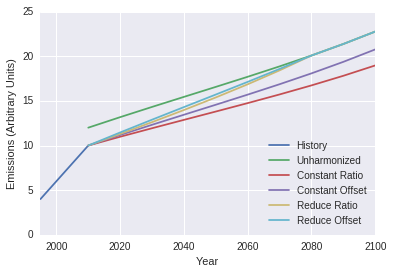

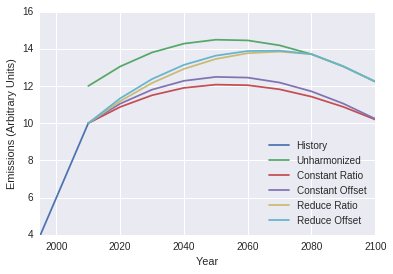

In [179]:
modelstart = 12
histend = 10
plot_all(horizon, histend, modelstart, ti, tf, n=0.75)

modelstart = 12
histend = 10
plot_all(horizon, histend, modelstart, ti, tf, n=1.2)

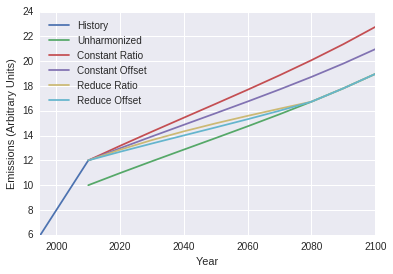

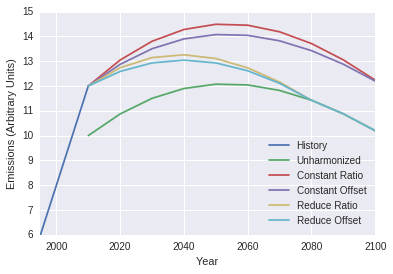

In [170]:
modelstart = 10
histend = 12
plot_all(horizon, histend, modelstart, ti, tf, n=0.75)

modelstart = 10
histend = 12
plot_all(horizon, histend, modelstart, ti, tf, n=1.2)

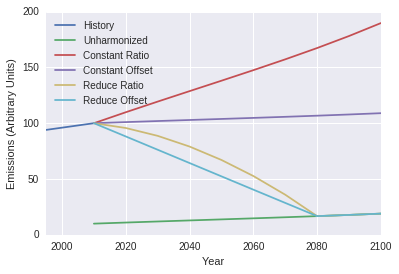

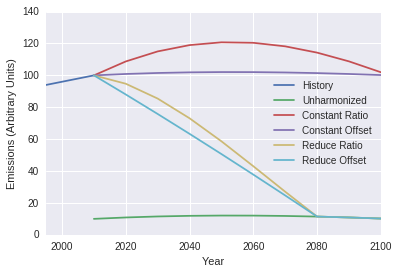

In [181]:
modelstart = 10
histend = 100
plot_all(horizon, histend, modelstart, ti, tf, n=0.75)

modelstart = 10
histend = 100
plot_all(horizon, histend, modelstart, ti, tf, n=1.2)

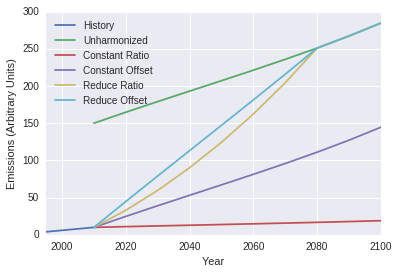

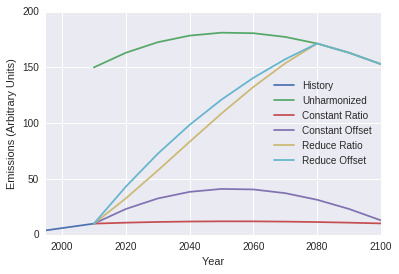

In [172]:
modelstart = 150
histend = 10
plot_all(horizon, histend, modelstart, ti, tf, n=0.75)
plot_all(horizon, histend, modelstart, ti, tf, n=1.2)

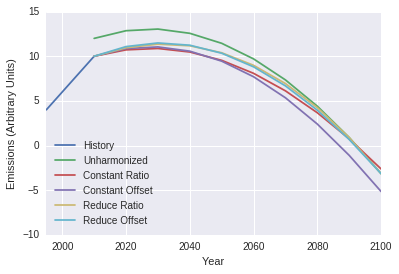

In [184]:
modelstart = 12
histend = 10
plot_all(horizon, histend, modelstart, ti, '2100', n=1.65)

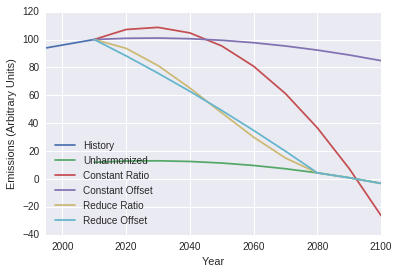

In [185]:
modelstart = 12
histend = 100
plot_all(horizon, histend, modelstart, ti, tf, n=1.65)

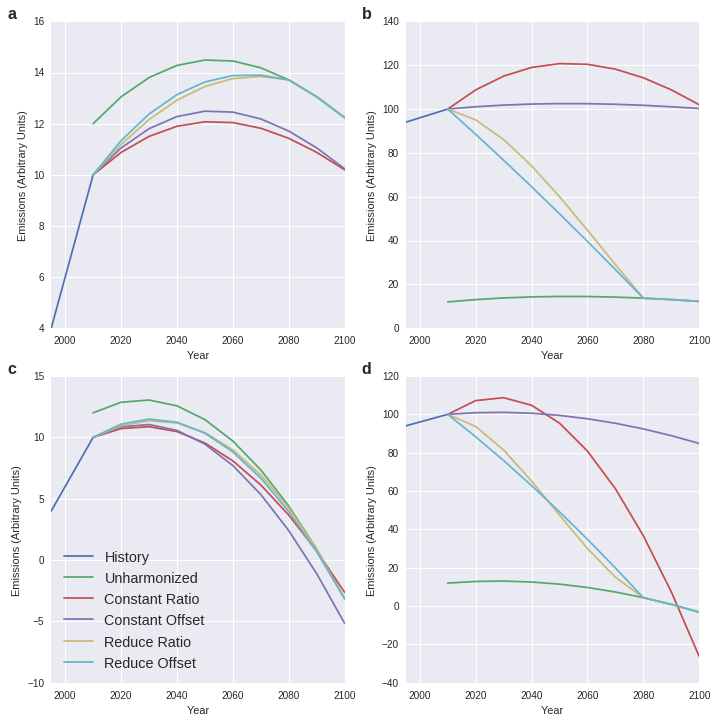

In [200]:
# now make the figure for the paper
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

# panel a
modelstart = 12
histend = 10
plot_all(horizon, histend, modelstart, ti, tf, n=1.2, ax=axs[0])
axs[0].legend().remove()

# panel b
modelstart = 12
histend = 100
plot_all(horizon, histend, modelstart, ti, tf, n=1.2, ax=axs[1])
axs[1].legend().remove()

# panel c
modelstart = 12
histend = 10
plot_all(horizon, histend, modelstart, ti, '2100', n=1.65, ax=axs[2])
axs[2].legend(loc='best', fontsize='x-large')

# panel d
modelstart = 12
histend = 100
plot_all(horizon, histend, modelstart, ti, tf, n=1.65, ax=axs[3])
axs[3].legend().remove()

for ax, letter in zip(axs, ['a', 'b', 'c', 'd']):
    ax.text(-0.15, 1.01, letter, transform=ax.transAxes, fontsize=16, fontweight='bold')
    
plt.tight_layout()
plt.savefig('../figs/cases.pdf')